In [1]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import pandas as pd
from pymoo.indicators.hv import HV
import numpy as np

# NSGA-II

In [2]:
methods = [
    "single-cutcat-unif",
    "multi-cutcat-unif",
    "single-cutcat-tour",
    "multi-cutcat-tour"
]

def nsga2_plot3d(df, name, e=40, a=-146, v=None):
    fig = plt.figure()
    axes = plt.axes(projection='3d')
    # if v != None:
    #     x, y, z = v
    #     axes.scatter3D([x], [y], [z], label="Reference point")
    for m in methods:
        to_use = df[df["method"] == m]

        axes.scatter3D(to_use['build_time'], to_use['search_time'], to_use['recall'], label=m)
        axes.set_xlabel('build_time')
        axes.set_ylabel('search_time')
        axes.set_zlabel('recall')

        axes.view_init(elev=e, azim=a)
        
    plt.legend()
    plt.savefig(f'../images/report/{name}.png')
    plt.show()

In [3]:
non_scaling = pd.read_csv("result-non-scaling.csv")
non_scaling_frontier = pd.read_csv("result-non-scaling-frontier.csv")

scaling = pd.read_csv("result-scaling.csv")
scaling_frontier = pd.read_csv("result-scaling-frontier.csv")

## Non-scaling

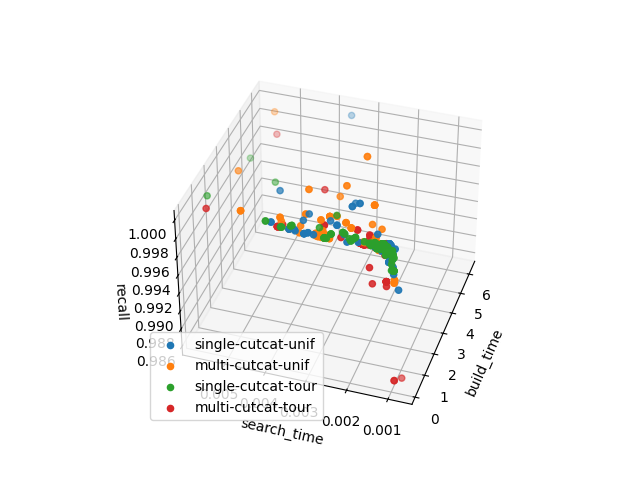

In [4]:
nsga2_plot3d(non_scaling, "non-scaling", 37, -162)

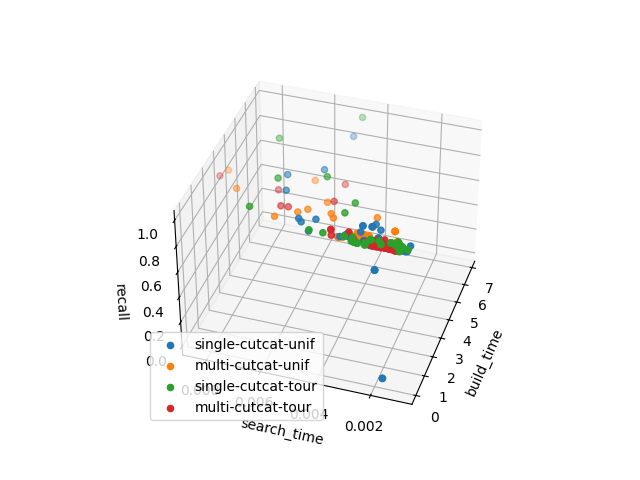

In [5]:
rp = [7, 0.01, 1]
ind = HV(ref_point=rp)
nsga2_plot3d(non_scaling_frontier, "non-scaling-frontier", 37, -162, rp)

In [6]:
for m in methods:
    to_use = non_scaling_frontier[non_scaling_frontier["method"] == m]
    print(f"HV of {m}:", 
          ind(np.array([to_use["build_time"], to_use["search_time"], 1 - to_use["recall"]]).transpose()))

HV of single-cutcat-unif: 0.061649212945264945
HV of multi-cutcat-unif: 0.056557109054404156
HV of single-cutcat-tour: 0.06103790681823225
HV of multi-cutcat-tour: 0.059035050860588696


In [7]:
def compute_row_hv(row):
    b = row["build_time"]
    s = row["search_time"]
    r = row["recall"]
    return ind(np.array([b, s, 1 - r]))

non_scaling_frontier["hv"] = non_scaling_frontier.apply(compute_row_hv, axis=1)
sorted_nsf = non_scaling_frontier.sort_values(by="hv", ascending=False)[:5]
print(sorted_nsf.drop(["method", "generation", "build_time", "memory", "search_time", "recall"], axis=1).to_latex())
sorted_nsf

\begin{tabular}{lrrrrr}
\toprule
 & max_deg & size_construction & size_search & alpha & hv \\
\midrule
190 & 960 & 373 & 105 & 1.039062 & 0.059254 \\
196 & 960 & 373 & 105 & 1.039062 & 0.059254 \\
181 & 960 & 373 & 105 & 1.039062 & 0.059254 \\
170 & 960 & 373 & 105 & 1.039062 & 0.059254 \\
71 & 13 & 199 & 173 & 1.141602 & 0.059149 \\
\bottomrule
\end{tabular}



,generation,method,max_deg,size_construction,size_search,alpha,build_time,memory,search_time,recall,hv
190,9,single-cutcat-tour,960,373,105,1.039062,0.359575,0,0.00106,0.9981,0.059254
196,10,single-cutcat-tour,960,373,105,1.039062,0.359575,0,0.00106,0.9981,0.059254
181,8,single-cutcat-tour,960,373,105,1.039062,0.359575,0,0.00106,0.9981,0.059254
170,7,single-cutcat-tour,960,373,105,1.039062,0.359575,0,0.00106,0.9981,0.059254
71,10,single-cutcat-unif,13,199,173,1.141602,0.273613,0,0.00117,0.9959,0.059149


## Scaling

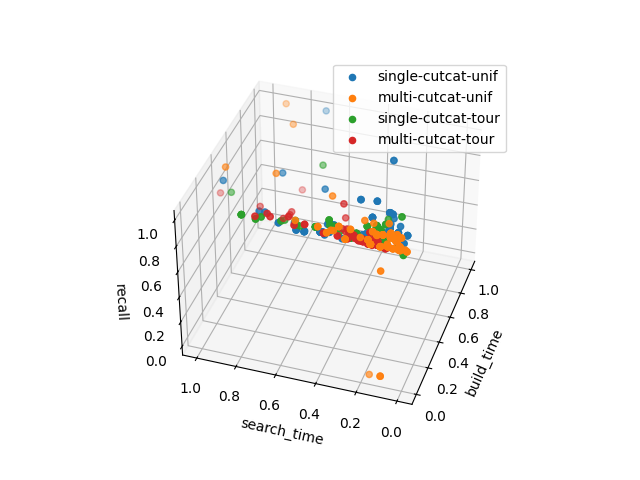

In [8]:
nsga2_plot3d(scaling, "scaling", 37, -162)

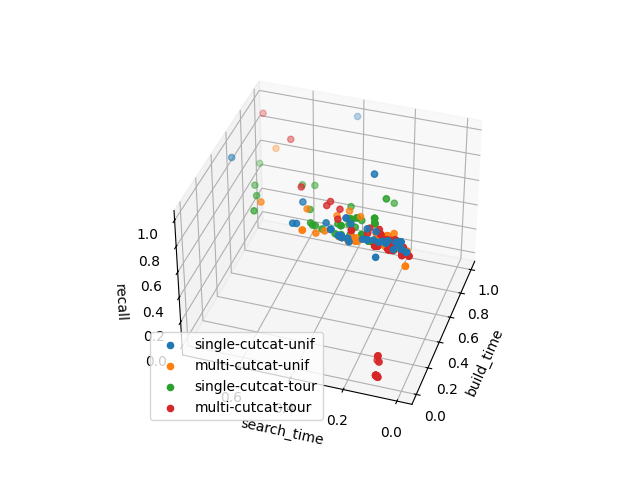

HV of single-cutcat-unif: 0.9944203900902945
HV of multi-cutcat-unif: 0.9746266889006485
HV of single-cutcat-tour: 0.9358094034442596
HV of multi-cutcat-tour: 0.9827659412270049


In [9]:
rp = [1, 1, 1]
nsga2_plot3d(scaling_frontier, "scaling-frontier", 37, -162, rp)
for m in methods:
    to_use = scaling_frontier[scaling_frontier["method"] == m]
    ind = HV(ref_point=rp)
    print(f"HV of {m}:", 
          ind(np.array([to_use["build_time"], to_use["search_time"], 1 - to_use["recall"]]).transpose()))

In [10]:
def compute_row_hv(row):
    b = row["build_time"]
    s = row["search_time"]
    r = row["recall"]
    return ind(np.array([b, s, 1 - r]))

scaling_frontier["hv"] = scaling_frontier.apply(compute_row_hv, axis=1)
sorted_sf = scaling_frontier.sort_values(by="hv", ascending=False)[:5]
print(sorted_sf.drop(["method", "generation", "build_time", "memory", "search_time", "recall"], axis=1).to_latex())
sorted_sf

\begin{tabular}{lrrrrr}
\toprule
 & max_deg & size_construction & size_search & alpha & hv \\
\midrule
58 & 52 & 101 & 149 & 1.019531 & 0.974299 \\
47 & 52 & 101 & 149 & 1.019531 & 0.974299 \\
96 & 929 & 186 & 114 & 1.059570 & 0.963338 \\
251 & 30 & 131 & 140 & 1.180664 & 0.960207 \\
262 & 30 & 131 & 140 & 1.180664 & 0.960207 \\
\bottomrule
\end{tabular}



,generation,method,max_deg,size_construction,size_search,alpha,build_time,memory,search_time,recall,hv
58,10,single-cutcat-unif,52,101,149,1.019531,0.023814,0,0.000633,0.9987,0.974299
47,9,single-cutcat-unif,52,101,149,1.019531,0.023814,0,0.000633,0.9987,0.974299
96,6,multi-cutcat-unif,929,186,114,1.059570,0.034441,0,0.000000,0.9977,0.963338
251,6,multi-cutcat-tour,30,131,140,1.180664,0.021870,0,0.016751,0.9984,0.960207
262,7,multi-cutcat-tour,30,131,140,1.180664,0.021870,0,0.016751,0.9984,0.960207


# Weighted Sum with BO

In [11]:
# def load_and_plot_ws(path):
#     weighting = path.split("-")[2].split(".")[0]

#     results = pd.read_csv(path).set_index("iter")
#     bests = results.sort_values(by="ws")[:10]
#     # results = results.sort_values(by="ws")[10:]
#     # fig = plt.figure()
#     # combs = [("M", "C"), ("M", "S"), ("M", "alpha"), ("C", "S"), ("C", "alpha"), ("S", "alpha")]
#     # for i, com in enumerate(combs):
#     #     c1, c2 = com
#     #     axes = plt.axes(projection='3d')
#     #     axes.scatter3D(results[c1], results[c2], abs(results["ws"] - 3), label="The rest", color="grey")
#     #     axes.scatter3D(bests[c1], bests[c2], abs(bests["ws"] - 3), label="Top 10", color="red")

#     #     axes.set_xlabel(c1)
#     #     axes.set_ylabel(c2)
#     #     axes.set_zlabel('Weighted sum')
#     #     axes.view_init(elev=25, azim=-145)

#     #     plt.legend()
#     #     plt.show()
#     #     plt.savefig(f"./images/report/w{weighting}-{c1}-{c2}.png")

#     # params = ["M", "C", "S", "alpha"]
#     # for p in params:
#     #     r = results.sort_values(by=p)
#     #     fig, ax = plt.subplots(1)
#     #     ax.scatter(r[p], r["ws"], label="All points")
#     #     ax.scatter(bests[p], bests["ws"], label="Top 10")

#     #     ax.set_xlabel(p)
#     #     ax.set_ylabel("Weighted sum")

#     #     plt.legend()
#     #     plt.show()
#     #     plt.savefig(f"../images/report/w{weighting}-{p}.png", bbox_inches="tight")

#     # return bests.to_latex(), bests.mean()
#     mean_pd = pd.DataFrame(bests.mean())
#     mean_pd["Mean"] = bests.mean()
#     # mean_pd = mean_pd.drop("0", axis=1)
#     mean_pd = mean_pd.transpose()[1:]
#     return pd.concat([bests, mean_pd]).to_latex()

# # for thing in load_and_plot_ws("bo-small-111.csv"):
# #     print(thing)
# print(load_and_plot_ws("bo-small-111.csv"))

In [12]:
# print(load_and_plot_ws("bo-small-112.csv"))

In [13]:
# print(load_and_plot_ws("bo-small-221.csv"))

In [14]:
# print(load_and_plot_ws("bo-small-123.csv"))

In [15]:
# paths = [f"bo-small-{w}.csv" for w in ["111", "112", "221", "123"]]
# small_results = []
# for path, w in zip(paths, ["111", "112", "221", "123"]):
#     r = pd.read_csv(path).set_index("iter")
#     small_results.append(r.sort_values(by="ws")[:10])
# results = pd.concat(small_results)
# bests = results.sort_values(by="ws")[:10]
# fig = plt.figure()


# params = ["M", "C", "S", "alpha"]
# for p in params:
#     r = results.sort_values(by=p)
#     fig, ax = plt.subplots(1)
#     ax.scatter(r[p], r["ws"], label="All points")
#     ax.scatter(bests[p], bests["ws"], label="Top 10")

#     ax.set_xlabel(p)
#     ax.set_ylabel("Weighted sum")

#     plt.legend()
#     plt.show()
#     plt.savefig(f"../images/report/wall-{p}.png", bbox_inches="tight")

# mean_pd = pd.DataFrame(bests.mean())
# mean_pd["Mean"] = bests.mean()
# mean_pd = mean_pd.transpose()[1:]
# print( pd.concat([bests, mean_pd]).to_latex())